# SVM Model: Epicurious Recipe Ratings
Goal: Transform this regression model into a classifier because most features are categorical. Cut your feature set down to the 30 most valuable features.

In [77]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

## Dataset

In [29]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
raw_data.info

<bound method DataFrame.info of                                              title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1      Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                    Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                        Spinach Noodle Casserole    3.125     547.0     20.0   
...                                            ...     ...       ...      ...   
20047                              Parmesan Puffs    3.125      28.0      2.0   
20048              Artichoke and Parmesan Risotto    4.375     671.0     22.0   
20049                       Turkey Cream Puff Pie    4.375     563.0     31.0   
20050     Snapper on Angel Hair with Citrus Cream    4.375     631.0     45.0   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0     73.0

In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

## Data Exploration

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [6]:
raw_data.head(10)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


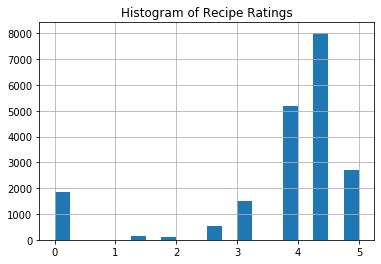

In [7]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [8]:
#raw_data.profile_report()

ProfileReport(raw_data) # https://pypi.org/project/pandas-profiling/

/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


Number of variables,680
Number of observations,20052
Total Missing (%),0.1%
Total size in memory,104.0 MiB
Average record size in memory,5.3 KiB
Numeric,3
Categorical,1
Boolean,672
Date,0
Text (Unique),0
Rejected,4


## Data Cleaning
Identify top columns by using a decision tree to rank most popular columns.

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_top_thirty = DecisionTreeClassifier()

#Raw Data without Nulles is second data set
raw_data2 = raw_data.dropna()

#X_top_thirty = raw_data_without_nulls.drop(columns=['rating','title'])
X_top_thirty = raw_data2.drop(columns=['rating','title'])

#Y_rating = (raw_data_without_nulls['rating']*1000).astype(int)
Y_rating = (raw_data2['rating']*1000).astype(int)

tree_top_thirty.fit(X_top_thirty, Y_rating)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Score of Decision Tree Classifier of Top Thirty Features

In [10]:
tree_top_thirty.score(X_top_thirty, Y_rating)
#Need to list tree_top_thirty_significant 

0.9999369641956631

In [11]:
pd.Series(tree_top_thirty.feature_importances_, index=X_top_thirty.columns).sort_values(ascending=False)[:50]

sodium               0.096413
calories             0.087550
fat                  0.064020
protein              0.052815
drink                0.015731
gourmet              0.009281
fall                 0.009140
summer               0.008857
winter               0.008509
quick & easy         0.007675
vegetarian           0.007581
tomato               0.007139
bake                 0.006726
dairy                0.006672
bon appétit          0.006561
vegetable            0.006337
tree nut free        0.006054
healthy              0.006038
no-cook              0.006024
herb                 0.005821
sauté                0.005795
kid-friendly         0.005664
lemon                0.005521
milk/cream           0.005446
spring               0.005289
garlic               0.005142
chill                0.005125
wheat/gluten-free    0.005101
egg                  0.005066
food processor       0.005008
ginger               0.004871
cheese               0.004669
dairy free           0.004538
kosher    

In [12]:
pd.Series?

In [13]:
raw_data2.shape

(15864, 680)

### Note: Subset of Data
Create a new subset of Data rather than creating a dictionary.
Remeber to use [] after DF.
Creating a subset slice data frame new_df = df[df['title'] != 'people']

In [ ]:

print (raw_data2)

### Alternative Method is Best Selection

In [38]:
raw_data.drop()

In [60]:
from sklearn.feature_selection import SelectKBest, chi2
X = raw_data2.drop(['title','rating'], axis=1)


#>pi_float = float(pi_string)
# x = X.astype('float')
y = (raw_data2['rating']*1000).astype(int)

# X, y = raw_data(return_X_y=True)
# X.shape

select_k_best = SelectKBest(chi2, k=30)

select_k_best.fit(X, y)


SelectKBest(k=30, score_func=<function chi2 at 0x1a1c1c29e0>)

In [73]:
X.columns[select_k_best.get_support()]

Index(['calories', 'protein', 'fat', 'sodium', 'alcoholic', 'bake', 'bitters',
       'bon appétit', 'chile pepper', 'cocktail', 'cocktail party',
       'condiment', 'crêpe', 'drink', 'fall', 'fruit juice', 'gin', 'gourmet',
       'harpercollins', 'house & garden', 'lime juice', 'liqueur',
       'non-alcoholic', 'pasta', 'quick & easy', 'rum', 'sauté', 'spirit',
       'tested & improved', 'vegetable'],
      dtype='object')

In [74]:
select_k_best.get_support()

<bound method SelectorMixin.get_support of SelectKBest(k=30, score_func=<function chi2 at 0x1a1c1c29e0>)>

In [66]:
X.columns[select_k_best.get_support()]

Index(['calories', 'protein', 'fat', 'sodium', 'alcoholic', 'bake', 'bitters',
       'bon appétit', 'chile pepper', 'cocktail', 'cocktail party',
       'condiment', 'crêpe', 'drink', 'fall', 'fruit juice', 'gin', 'gourmet',
       'harpercollins', 'house & garden', 'lime juice', 'liqueur',
       'non-alcoholic', 'pasta', 'quick & easy', 'rum', 'sauté', 'spirit',
       'tested & improved', 'vegetable'],
      dtype='object')

In [48]:
X.shape

(15864, 678)

In [ ]:
raw_data2.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [ ]:
# Count nulls 
null_count = raw_data2.isnull().sum()
null_count[null_count>0]

#We'll drop the whole columns for calories, protein, fat, and sodium. 
#We'll come back to nutrition information later.

## Split Train and Test Data

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [79]:
#X = life_df.iloc[:,[4,6,7,8,9,10,11,12,13,14,15,18,19]]  #Features

#X = raw_data2.iloc[:,sodium,calories,fat,protein,drink,fall,gourmet,vegetarian,summer,winter,vegetable,quick & easy, tree nut free,dairy,tomato,
#                    bake,bon appétit,kid-friendly,milk/cream,no-cook,sauté,wheat/gluten-free,kosher,food processor,spring,herb,healthy,chill,egg,peanut free,garlic]

X = raw_data2[['sodium','calories','fat','protein','drink','fall','gourmet','vegetarian','summer','winter','vegetable','quick & easy','tree nut free','dairy','tomato',
                    'bake','bon appétit','kid-friendly','milk/cream','no-cook','sauté','wheat/gluten-free','kosher','food processor','spring','herb','healthy','chill','egg','peanut free','garlic']]   
    
y = Y_rating         #Target variable is the rating *1,000 to become categorical, not float

#Split data to train and test with 20% sample 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25,random_state =5)

In [80]:
X_train

,sodium,calories,fat,protein,drink,fall,gourmet,vegetarian,summer,winter,...,wheat/gluten-free,kosher,food processor,spring,herb,healthy,chill,egg,peanut free,garlic
2305,113.0,501.0,18.0,13.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15150,611.0,194.0,12.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2207,2079.0,576.0,19.0,75.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13325,13.0,164.0,13.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16996,224.0,284.0,11.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,514.0,1134.0,84.0,82.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12482,625.0,389.0,23.0,29.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5104,63.0,1113.0,75.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2841,730.0,369.0,16.0,13.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X_test

,sodium,calories,fat,protein,drink,fall,gourmet,vegetarian,summer,winter,...,wheat/gluten-free,kosher,food processor,spring,herb,healthy,chill,egg,peanut free,garlic
2917,525.0,323.0,31.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2439,48.0,243.0,21.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11181,1091.0,98.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8361,22.0,57.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9733,144.0,224.0,16.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272,6.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18173,48.0,77.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4202,70.0,342.0,18.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5689,136.0,275.0,19.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Analysis: Our X_test set is using 3,966 rows to represent 25% of our data across the 31 columns of interest

In [82]:
Y_rating.shape

(15864,)

## Run SVM Model: Top Thirty

from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

### NOTE: Use SVC for classifier b/c the above is to get regressor

In [83]:
## TOP Thirty
from sklearn.svm import SVC
svc = SVC()

#X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)

svc.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [84]:
#Support Vector Model Score
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X_train, y_train, cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

array([0.47754931, 0.47123058, 0.46512605, 0.47771236, 0.46212121])

In [85]:
svc.score(X_train, y_train)

0.9306606152294503

In [86]:
svc.score(X_test, y_test)

0.47100353000504286

## Compare to Decision Tree Classifier Model

In [90]:
#Check SVC model by Comparing to Decision Tree Classifier model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Select Classifier
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 5, max_depth =5, min_samples_leaf =5)
    
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

[Text(172.2825, 199.32, 'X[4] <= 0.5\ngini = 0.73\nsamples = 11898\nvalue = [974, 101, 60, 318, 872, 3093, 4941, 1539]'),
 Text(89.28, 163.07999999999998, 'X[3] <= 4.5\ngini = 0.718\nsamples = 11307\nvalue = [723, 92, 57, 297, 856, 3026, 4858, 1398]'),
 Text(44.64, 126.83999999999999, 'X[3] <= 1.5\ngini = 0.765\nsamples = 3529\nvalue = [389, 38, 27, 108, 284, 883, 1274, 526]'),
 Text(22.32, 90.6, 'X[5] <= 0.5\ngini = 0.791\nsamples = 1163\nvalue = [191, 15, 9, 43, 83, 264, 354, 204]'),
 Text(11.16, 54.359999999999985, 'X[6] <= 0.5\ngini = 0.799\nsamples = 1021\nvalue = [184, 14, 9, 40, 74, 236, 282, 182]'),
 Text(5.58, 18.119999999999976, 'gini = 0.793\nsamples = 621\nvalue = [149, 7, 7, 18, 38, 121, 170, 111]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.788\nsamples = 400\nvalue = [35, 7, 2, 22, 36, 115, 112, 71]'),
 Text(33.480000000000004, 54.359999999999985, 'X[1] <= 267.5\ngini = 0.673\nsamples = 142\nvalue = [7, 1, 0, 3, 9, 28, 72, 22]'),
 Text(27.9, 18.119999999999

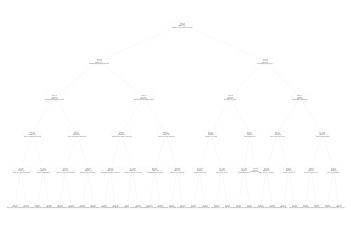

In [92]:
tree.plot_tree(clf)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
clf.score(X_train,y_train)

[Text(172.2825, 199.32, 'X[4] <= 0.5\ngini = 0.73\nsamples = 11898\nvalue = [974, 101, 60, 318, 872, 3093, 4941, 1539]'),
 Text(89.28, 163.07999999999998, 'X[3] <= 4.5\ngini = 0.718\nsamples = 11307\nvalue = [723, 92, 57, 297, 856, 3026, 4858, 1398]'),
 Text(44.64, 126.83999999999999, 'X[3] <= 1.5\ngini = 0.765\nsamples = 3529\nvalue = [389, 38, 27, 108, 284, 883, 1274, 526]'),
 Text(22.32, 90.6, 'X[5] <= 0.5\ngini = 0.791\nsamples = 1163\nvalue = [191, 15, 9, 43, 83, 264, 354, 204]'),
 Text(11.16, 54.359999999999985, 'X[6] <= 0.5\ngini = 0.799\nsamples = 1021\nvalue = [184, 14, 9, 40, 74, 236, 282, 182]'),
 Text(5.58, 18.119999999999976, 'gini = 0.793\nsamples = 621\nvalue = [149, 7, 7, 18, 38, 121, 170, 111]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.788\nsamples = 400\nvalue = [35, 7, 2, 22, 36, 115, 112, 71]'),
 Text(33.480000000000004, 54.359999999999985, 'X[1] <= 267.5\ngini = 0.673\nsamples = 142\nvalue = [7, 1, 0, 3, 9, 28, 72, 22]'),
 Text(27.9, 18.119999999999

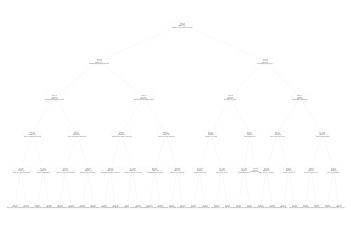

In [89]:
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

raw_data2 = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(raw_data2) 
graph.render("High")

tree.plot_tree(clf) # Need to prune the tree b/c training data is overfitted

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
raw_data2 = tree.export_graphviz(model, 
                  feature_names=,  
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(raw_data2)
graph

### Note: Compare Actual to Predicted

In [ ]:
plt.scatter(y, svc.predict(X))

## Bias:
*Note: Difference in fit between data sets is called "variance". ~Source: https://www.youtube.com/watch?v=EuBBz3bI-aA

Q) Is there anything in this dataset that makes you think it could be biased, perhaps extremely so? 

A)
*The inability for machine learning model to capture the true relationship is called 'bias'.
There is no random sample. People who select a certain recipe, might have set expectations, and therefore could be more likely to give 'high' reviews if the recipe meets their expecations.
